# 2010 Baja CA EQ, QTM Catalog Mapping: Density Grid Test Points



In [1]:
# IMPORT CELL; updated 2/11/21

import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from IPython.display import Image
import warnings
warnings.filterwarnings('ignore') 
from importlib import reload
import time
import math
import scipy.stats as stats

import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000

import obspy
from obspy.core import UTCDateTime
from obspy import read

import obspy.geodetics as gd # Imported whole file
#from obspy.geodetics import locations2degrees # calc_dist() alike?
#from obspy.taup.taup_geo import calc_dist # calc_dist()

import cartopy
import cartopy.crs as ccrs
from cartopy import config
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy import feature as cfeature
from cartopy.feature import NaturalEarthFeature, LAND, COASTLINE, OCEAN, LAKES, BORDERS
import matplotlib.ticker as mticker

print("Imported! ")

Imported! 


In [2]:
%%time
QTM_Range = pd.read_pickle("QTM_Range.pkl")
QTM_Range

Wall time: 736 ms


,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND,EVENTID,LATITUDE,LONGITUDE,DEPTH,...,TEMPLATEID,STACKCC,MAD,RELOCATED?,POSIX TIME,TIMESTAMP,VECTORIZATION,VTIMESTAMP,RELATIVE DAY,RELATIVE HOUR
341563,2010,3,5,22,40,56.570,332205,33.63921,-116.69371,16.395,...,11023517,0.208,0.021,0,2010-03-05T22:40:56.570000Z,1.267829e+09,2010-03-05T22:40:56.570000Z,1.267829e+09,-30.0,-720.0
341564,2010,3,5,22,44,28.810,332206,33.00096,-116.33812,8.098,...,14599964,0.274,0.024,0,2010-03-05T22:44:28.810000Z,1.267829e+09,2010-03-05T22:44:28.809999Z,1.267829e+09,-30.0,-720.0
341565,2010,3,5,22,59,35.670,332207,33.68388,-116.70518,16.740,...,9715717,0.182,0.019,0,2010-03-05T22:59:35.670000Z,1.267830e+09,2010-03-05T22:59:35.670000Z,1.267830e+09,-30.0,-720.0
341566,2010,3,5,23,22,38.272,14597244,33.89683,-116.20141,9.967,...,14597244,1.0,0.01,1,2010-03-05T23:22:38.272000Z,1.267831e+09,2010-03-05T23:22:38.271999Z,1.267831e+09,-30.0,-719.0
341567,2010,3,5,23,37,37.430,332209,33.17265,-115.61604,2.806,...,11247074,0.191,0.02,0,2010-03-05T23:37:37.430000Z,1.267832e+09,2010-03-05T23:37:37.429999Z,1.267832e+09,-30.0,-719.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479972,2010,5,4,22,34,42.330,14693572,32.22300,-115.27750,8.680,...,14693572,1.0,0.01,0,2010-05-04T22:34:42.330000Z,1.273012e+09,2010-05-04T22:34:42.329999Z,1.273012e+09,30.0,720.0
479973,2010,5,4,22,35,48.290,14693580,32.20351,-115.25989,3.764,...,14693580,1.0,0.01,1,2010-05-04T22:35:48.290000Z,1.273013e+09,2010-05-04T22:35:48.289999Z,1.273013e+09,30.0,720.0
479974,2010,5,4,22,36,27.620,36905559,32.65953,-115.79090,8.256,...,36905559,1.0,0.01,0,2010-05-04T22:36:27.620000Z,1.273013e+09,2010-05-04T22:36:27.620000Z,1.273013e+09,30.0,720.0
479975,2010,5,4,22,37,25.670,465027,33.72415,-116.82370,17.104,...,14063504,0.233,0.019,0,2010-05-04T22:37:25.670000Z,1.273013e+09,2010-05-04T22:37:25.670000Z,1.273013e+09,30.0,720.0


In [3]:
# Set mean latitudes and longitudes
MeanLat = QTM_Range["LATITUDE"].mean()
MeanLon = QTM_Range["LONGITUDE"].mean() 

# Define two more datasets of 30 days before and 30 days after Baja EQ
QTM_TEMP = QTM_Range.loc[QTM_Range["EVENTID"] == ""] # Get Baja EQ
QTM_TEMP = QTM_TEMP.iloc[0]
BajaTimestamp = float(QTM_TEMP["TIMESTAMP"])
BajaTimestamp

1270420842.0

In [4]:
QTM_Range_BEFORE = QTM_Range.loc[QTM_Range["TIMESTAMP"] <= BajaTimestamp]
QTM_Range_AFTER = QTM_Range.loc[QTM_Range["TIMESTAMP"] >= BajaTimestamp]

QTM_Range_BEFORE.describe()
QTM_Range_AFTER

,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND,EVENTID,LATITUDE,LONGITUDE,DEPTH,...,TEMPLATEID,STACKCC,MAD,RELOCATED?,POSIX TIME,TIMESTAMP,VECTORIZATION,VTIMESTAMP,RELATIVE DAY,RELATIVE HOUR
356879,2010,4,4,22,40,42.00,,32.28600,-115.29500,10.000,...,,,,,2010-04-04T22:40:42.000000Z,1.270421e+09,2010-04-04T22:40:42.000000Z,1.270421e+09,0.0,0.0
356879,2010,4,4,22,40,42.00,,32.28600,-115.29500,10.000,...,,,,,2010-04-04T22:40:42.000000Z,1.270421e+09,2010-04-04T22:40:42.000000Z,1.270421e+09,0.0,0.0
356880,2010,4,4,22,40,42.16,14607652,32.27350,-115.29400,13.990,...,14607652,1.0,0.01,0,2010-04-04T22:40:42.160000Z,1.270421e+09,2010-04-04T22:40:42.159999Z,1.270421e+09,0.0,0.0
356881,2010,4,4,22,41,45.87,347184,34.43929,-116.93557,-0.583,...,9807541,0.264,0.026,0,2010-04-04T22:41:45.870000Z,1.270421e+09,2010-04-04T22:41:45.869999Z,1.270421e+09,0.0,0.0
356882,2010,4,4,22,41,54.35,347185,33.16622,-115.59365,4.499,...,10531677,0.163,0.017,0,2010-04-04T22:41:54.350000Z,1.270421e+09,2010-04-04T22:41:54.350000Z,1.270421e+09,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479972,2010,5,4,22,34,42.33,14693572,32.22300,-115.27750,8.680,...,14693572,1.0,0.01,0,2010-05-04T22:34:42.330000Z,1.273012e+09,2010-05-04T22:34:42.329999Z,1.273012e+09,30.0,720.0
479973,2010,5,4,22,35,48.29,14693580,32.20351,-115.25989,3.764,...,14693580,1.0,0.01,1,2010-05-04T22:35:48.290000Z,1.273013e+09,2010-05-04T22:35:48.289999Z,1.273013e+09,30.0,720.0
479974,2010,5,4,22,36,27.62,36905559,32.65953,-115.79090,8.256,...,36905559,1.0,0.01,0,2010-05-04T22:36:27.620000Z,1.273013e+09,2010-05-04T22:36:27.620000Z,1.273013e+09,30.0,720.0
479975,2010,5,4,22,37,25.67,465027,33.72415,-116.82370,17.104,...,14063504,0.233,0.019,0,2010-05-04T22:37:25.670000Z,1.273013e+09,2010-05-04T22:37:25.670000Z,1.273013e+09,30.0,720.0


In [5]:
QTM_Range["LONGITUDE"].values[0]
len(QTM_Range)
QTM_Range["LONGITUDE"].values

Faults = pd.read_csv("cafaults.xy", sep = "[\s]", names = ["LONGITUDE", "LATITUDE"])
# Read in fault traces
Faults
#Faults.describe()
#print(Faults.LATITUDE)
#Faults["LONGITUDE"].astype(float)
#Faults = Faults.loc[Faults["LONGITUDE"] == float]
#Faults.columns = ["LONGITUDE", "LATITUDE"]
#Faults
#Faults.LONGITUDE.astype(float)

FaultsIndices = list(Faults.loc[Faults["LONGITUDE"] == ">"].index)
#FaultsIndices

## Density Grid: First Gridpoint - Point1

(32.7, -115.8)

In [6]:
GridPoints = pd.read_csv("Maps/Density Grid/GridPoints.csv")

In [7]:
# Create first point for analysis

Point1 = GridPoints.loc[(GridPoints["LATITUDE"] >= 32.7) & (GridPoints["LONGITUDE"] >= -115.8)]
#Point1 = Point1.loc[Point1["LONGITUDE"] == -115.8]
Point1 = Point1.iloc[0]
Point1 # 32.7, -115.8

Unnamed: 0    742.0
LATITUDE       32.7
LONGITUDE    -115.8
Name: 742, dtype: float64

In [8]:
# TEST CELL

GridPoints.loc[(GridPoints.LATITUDE == 32.7)] # Never use == boolean operator for floats!
GridPoints.iloc[720]["LATITUDE"] # Verified precision error

#Point1.LATITUDE # type: numpy float64
#Point1.LONGITUDE # type: numpy float64

gd.degrees2kilometers(1)

111.19492664455873

In [9]:
# Use ObsPy: calc_dist() function (returns distance between two points)
# calc_dist() can take list input?
# calc_dist(source_lat_deg, source_lon_deg, receiver_lat_deg, receiver_lon_deg)
#calc_dist(Point1.LATITUDE, Point1.LONGITUDE, 32, 115, )

In [10]:
# Use ObsPy: locations2degrees function (returns distance between two points)
# location2degrees(source_lat_deg, source_lon_deg, receiver_lat_deg, receiver_lon_deg)
# returns distance in degrees as float

Dists1_Deg = gd.locations2degrees(Point1.LATITUDE, Point1.LONGITUDE, 
                              QTM_Range.LATITUDE, QTM_Range.LONGITUDE)
# Got distances of all earthquakes in catalog from Point1
Dists1_KM = gd.degrees2kilometers(Dists1_Deg)
# Converted all distances to kilometers
Dists1_KM

array([ 133.51326785,   60.38831846,  138.06892128, ...,    4.57994691,
        148.45194808,    9.32164714])

In [11]:
# Define a new copy of the data
Point1Data = QTM_Range.copy(deep = True)
Point1Data["DISTANCE"] = Dists1_KM
Point1Data.describe()

# Only take data within, say, 11km of Point1!
Point1Data_11KM = Point1Data.loc[Point1Data["DISTANCE"] <= 11]
Point1Data_11KM
# Sometimes, this returns only five datapoints instead of 989; switched notebooks and it was fine?

#Point1Data.describe()

,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND,EVENTID,LATITUDE,LONGITUDE,DEPTH,...,STACKCC,MAD,RELOCATED?,POSIX TIME,TIMESTAMP,VECTORIZATION,VTIMESTAMP,RELATIVE DAY,RELATIVE HOUR,DISTANCE
341583,2010,3,6,1,0,37.210,332225,32.69500,-115.90440,5.212,...,0.203,0.021,0,2010-03-06T01:00:37.210000Z,1.267837e+09,2010-03-06T01:00:37.210000Z,1.267837e+09,-30.0,-718.0,9.784970
341587,2010,3,6,1,12,2.050,332229,32.65175,-115.72995,5.945,...,0.183,0.019,0,2010-03-06T01:12:02.050000Z,1.267838e+09,2010-03-06T01:12:02.049999Z,1.267838e+09,-30.0,-717.0,8.471847
341591,2010,3,6,1,30,3.570,332232,32.66548,-115.75539,9.083,...,0.182,0.019,0,2010-03-06T01:30:03.570000Z,1.267839e+09,2010-03-06T01:30:03.569999Z,1.267839e+09,-30.0,-717.0,5.671390
341813,2010,3,6,22,34,12.870,332447,32.68190,-115.85838,8.370,...,0.204,0.021,0,2010-03-06T22:34:12.870000Z,1.267915e+09,2010-03-06T22:34:12.869999Z,1.267915e+09,-29.0,-696.0,5.822199
341851,2010,3,7,1,48,43.770,332482,32.61695,-115.75363,9.318,...,0.209,0.022,0,2010-03-07T01:48:43.770000Z,1.267927e+09,2010-03-07T01:48:43.770000Z,1.267927e+09,-29.0,-693.0,10.204124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479963,2010,5,4,22,29,27.410,465017,32.63811,-115.76575,10.688,...,0.401,0.022,0,2010-05-04T22:29:27.410000Z,1.273012e+09,2010-05-04T22:29:27.410000Z,1.273012e+09,30.0,720.0,7.591968
479964,2010,5,4,22,29,30.530,465018,32.65248,-115.73253,8.814,...,0.337,0.024,0,2010-05-04T22:29:30.530000Z,1.273012e+09,2010-05-04T22:29:30.530000Z,1.273012e+09,30.0,720.0,8.234030
479965,2010,5,4,22,29,54.777,465019,32.68718,-115.81664,6.768,...,0.549,0.019,1,2010-05-04T22:29:54.777000Z,1.273012e+09,2010-05-04T22:29:54.777000Z,1.273012e+09,30.0,720.0,2.111115
479974,2010,5,4,22,36,27.620,36905559,32.65953,-115.79090,8.256,...,1.0,0.01,0,2010-05-04T22:36:27.620000Z,1.273013e+09,2010-05-04T22:36:27.620000Z,1.273013e+09,30.0,720.0,4.579947


## Density Grid: Second Point - Point2
Along fault line<br>(32.6585, -115.8862)

In [12]:
# Create second point for analysis: fault line

Point2 = pd.DataFrame({"LATITUDE" : [32.6585], "LONGITUDE" : [-115.8862]})
#Point2["LATITUDE"] = 33.0403 # 33.0403, -116.5071
Point2

,LATITUDE,LONGITUDE
0,32.6585,-115.8862


In [13]:
# Use ObsPy: locations2degrees function (returns distance between two points)
# location2degrees(source_lat_deg, source_lon_deg, receiver_lat_deg, receiver_lon_deg)
# returns distance in degrees as float

Dists2_Deg = gd.locations2degrees(Point2.LATITUDE, Point2.LONGITUDE, 
                              QTM_Range.LATITUDE, QTM_Range.LONGITUDE)
# Got distances of all earthquakes in catalog from Point2
Dists2_KM = gd.degrees2kilometers(Dists2_Deg)
# Converted all distances to kilometers
Dists2_KM

array([ 132.45094474,   56.85981535,  137.14932701, ...,    8.9222135 ,
        147.14223339,   16.29985863])

In [14]:
# Define a new copy of the data
Point2Data = QTM_Range.copy(deep = True)
Point2Data["DISTANCE"] = Dists2_KM
Point2Data.describe()

# Only take data within, say, 11km of Point2!
Point2Data_11KM = Point2Data.loc[Point2Data["DISTANCE"] <= 11]
Point2Data_11KM

,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND,EVENTID,LATITUDE,LONGITUDE,DEPTH,...,STACKCC,MAD,RELOCATED?,POSIX TIME,TIMESTAMP,VECTORIZATION,VTIMESTAMP,RELATIVE DAY,RELATIVE HOUR,DISTANCE
341583,2010,3,6,1,0,37.210,332225,32.69500,-115.90440,5.212,...,0.203,0.021,0,2010-03-06T01:00:37.210000Z,1.267837e+09,2010-03-06T01:00:37.210000Z,1.267837e+09,-30.0,-718.0,4.401601
341721,2010,3,6,13,25,37.150,332358,32.71166,-115.92436,2.383,...,0.213,0.022,0,2010-03-06T13:25:37.150000Z,1.267882e+09,2010-03-06T13:25:37.149999Z,1.267882e+09,-29.0,-705.0,6.906193
341813,2010,3,6,22,34,12.870,332447,32.68190,-115.85838,8.370,...,0.204,0.021,0,2010-03-06T22:34:12.870000Z,1.267915e+09,2010-03-06T22:34:12.869999Z,1.267915e+09,-29.0,-696.0,3.681195
342080,2010,3,7,14,55,5.310,332707,32.67409,-115.92619,6.566,...,0.234,0.023,0,2010-03-07T14:55:05.310000Z,1.267974e+09,2010-03-07T14:55:05.309999Z,1.267974e+09,-28.0,-680.0,4.125259
342234,2010,3,8,1,21,19.332,332859,32.64761,-115.76947,8.995,...,0.285,0.022,1,2010-03-08T01:21:19.332000Z,1.268011e+09,2010-03-08T01:21:19.332000Z,1.268011e+09,-28.0,-669.0,10.995252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479952,2010,5,4,22,24,36.571,14693532,32.70741,-115.97575,5.560,...,1.0,0.01,1,2010-05-04T22:24:36.571000Z,1.273012e+09,2010-05-04T22:24:36.570999Z,1.273012e+09,30.0,720.0,9.990898
479954,2010,5,4,22,26,7.337,465008,32.68990,-115.79556,1.886,...,0.296,0.024,1,2010-05-04T22:26:07.337000Z,1.273012e+09,2010-05-04T22:26:07.336999Z,1.273012e+09,30.0,720.0,9.174173
479957,2010,5,4,22,28,4.850,465011,32.67193,-115.82185,0.364,...,0.242,0.024,0,2010-05-04T22:28:04.850000Z,1.273012e+09,2010-05-04T22:28:04.849999Z,1.273012e+09,30.0,720.0,6.206036
479965,2010,5,4,22,29,54.777,465019,32.68718,-115.81664,6.768,...,0.549,0.019,1,2010-05-04T22:29:54.777000Z,1.273012e+09,2010-05-04T22:29:54.777000Z,1.273012e+09,30.0,720.0,7.249901


### Density Grid: Third Point - Point3
Along fault line<br>(33.5059, -116.4916)

In [15]:
# Create third point for analysis: fault line

Point3 = pd.DataFrame({"LATITUDE" : [33.5059], "LONGITUDE" : [-116.4916]})
#Point2["LATITUDE"] = 33.0403 # 33.0403, -116.5071
Point3

,LATITUDE,LONGITUDE
0,33.5059,-116.4916


In [16]:
# Use ObsPy: locations2degrees function (returns distance between two points)
# location2degrees(source_lat_deg, source_lon_deg, receiver_lat_deg, receiver_lon_deg)
# returns distance in degrees as float

Dists3_Deg = gd.locations2degrees(Point3.LATITUDE, Point3.LONGITUDE, 
                              QTM_Range.LATITUDE, QTM_Range.LONGITUDE)
# Got distances of all earthquakes in catalog from Point3
Dists3_KM = gd.degrees2kilometers(Dists3_Deg)
# Converted all distances to kilometers
Dists3_KM

array([  23.88193772,   57.93217336,   27.98211099, ...,  114.53718859,
         39.17486556,  118.78201122])

In [17]:
# Define a new copy of the data
Point3Data = QTM_Range.copy(deep = True)
Point3Data["DISTANCE"] = Dists3_KM
Point3Data.describe()

# Only take data within, say, 11km of Point3!
Point3Data_11KM = Point3Data.loc[Point3Data["DISTANCE"] <= 11]
Point3Data_11KM

,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND,EVENTID,LATITUDE,LONGITUDE,DEPTH,...,STACKCC,MAD,RELOCATED?,POSIX TIME,TIMESTAMP,VECTORIZATION,VTIMESTAMP,RELATIVE DAY,RELATIVE HOUR,DISTANCE
341578,2010,3,6,0,21,32.423,332220,33.49065,-116.49557,13.794,...,0.242,0.024,1,2010-03-06T00:21:32.423000Z,1.267835e+09,2010-03-06T00:21:32.423000Z,1.267835e+09,-30.0,-718.0,1.735220
341581,2010,3,6,0,39,0.683,332223,33.50516,-116.45194,5.742,...,0.347,0.024,1,2010-03-06T00:39:00.683000Z,1.267836e+09,2010-03-06T00:39:00.683000Z,1.267836e+09,-30.0,-718.0,3.678114
341609,2010,3,6,2,43,57.010,332250,33.50513,-116.45254,5.659,...,0.22,0.023,0,2010-03-06T02:43:57.010000Z,1.267843e+09,2010-03-06T02:43:57.009999Z,1.267843e+09,-30.0,-716.0,3.622576
341621,2010,3,6,3,49,11.965,332262,33.47085,-116.59398,10.378,...,0.416,0.022,1,2010-03-06T03:49:11.965000Z,1.267847e+09,2010-03-06T03:49:11.964999Z,1.267847e+09,-30.0,-715.0,10.263146
341625,2010,3,6,4,1,21.492,332266,33.47154,-116.59359,10.395,...,0.312,0.022,1,2010-03-06T04:01:21.492000Z,1.267848e+09,2010-03-06T04:01:21.492000Z,1.267848e+09,-30.0,-715.0,10.200678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479927,2010,5,4,21,59,24.790,464982,33.49771,-116.57848,8.476,...,0.214,0.021,0,2010-05-04T21:59:24.790000Z,1.273010e+09,2010-05-04T21:59:24.789999Z,1.273010e+09,30.0,719.0,8.106994
479940,2010,5,4,22,12,1.870,464995,33.52010,-116.45470,6.296,...,0.197,0.02,0,2010-05-04T22:12:01.870000Z,1.273011e+09,2010-05-04T22:12:01.870000Z,1.273011e+09,30.0,720.0,3.767806
479960,2010,5,4,22,28,16.590,465014,33.45432,-116.46069,11.982,...,0.147,0.015,0,2010-05-04T22:28:16.590000Z,1.273012e+09,2010-05-04T22:28:16.589999Z,1.273012e+09,30.0,720.0,6.411979
479962,2010,5,4,22,28,37.790,465016,33.49900,-116.53127,8.409,...,0.115,0.012,0,2010-05-04T22:28:37.790000Z,1.273012e+09,2010-05-04T22:28:37.789999Z,1.273012e+09,30.0,720.0,3.757420


#### Point3: Before

In [18]:
# BEFORE

Dists3_BEFORE_Deg = gd.locations2degrees(Point3.LATITUDE, Point3.LONGITUDE, 
                              QTM_Range_BEFORE.LATITUDE, QTM_Range_BEFORE.LONGITUDE)
# Got distances of all earthquakes in catalog from Point3
Dists3_BEFORE_KM = gd.degrees2kilometers(Dists3_BEFORE_Deg)
# Converted all distances to kilometers
Dists3_BEFORE_KM

array([  23.88193772,   57.93217336,   27.98211099, ...,  176.67690094,
        175.72850733,  175.72850733])

In [19]:
# Define a new copy of the data
Point3Data_BEFORE = QTM_Range_BEFORE.copy(deep = True)
Point3Data_BEFORE["DISTANCE"] = Dists3_BEFORE_KM
Point3Data_BEFORE.describe()

# Only take data within, say, 11km of Point3!
Point3Data_BEFORE_11KM = Point3Data_BEFORE.loc[Point3Data_BEFORE["DISTANCE"] <= 11]
Point3Data_BEFORE_11KM

,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND,EVENTID,LATITUDE,LONGITUDE,DEPTH,...,STACKCC,MAD,RELOCATED?,POSIX TIME,TIMESTAMP,VECTORIZATION,VTIMESTAMP,RELATIVE DAY,RELATIVE HOUR,DISTANCE
341578,2010,3,6,0,21,32.423,332220,33.49065,-116.49557,13.794,...,0.242,0.024,1,2010-03-06T00:21:32.423000Z,1.267835e+09,2010-03-06T00:21:32.423000Z,1.267835e+09,-30.0,-718.0,1.735220
341581,2010,3,6,0,39,0.683,332223,33.50516,-116.45194,5.742,...,0.347,0.024,1,2010-03-06T00:39:00.683000Z,1.267836e+09,2010-03-06T00:39:00.683000Z,1.267836e+09,-30.0,-718.0,3.678114
341609,2010,3,6,2,43,57.010,332250,33.50513,-116.45254,5.659,...,0.22,0.023,0,2010-03-06T02:43:57.010000Z,1.267843e+09,2010-03-06T02:43:57.009999Z,1.267843e+09,-30.0,-716.0,3.622576
341621,2010,3,6,3,49,11.965,332262,33.47085,-116.59398,10.378,...,0.416,0.022,1,2010-03-06T03:49:11.965000Z,1.267847e+09,2010-03-06T03:49:11.964999Z,1.267847e+09,-30.0,-715.0,10.263146
341625,2010,3,6,4,1,21.492,332266,33.47154,-116.59359,10.395,...,0.312,0.022,1,2010-03-06T04:01:21.492000Z,1.267848e+09,2010-03-06T04:01:21.492000Z,1.267848e+09,-30.0,-715.0,10.200678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356838,2010,4,4,20,37,15.767,347147,33.48764,-116.57341,8.372,...,0.366,0.022,1,2010-04-04T20:37:15.767000Z,1.270413e+09,2010-04-04T20:37:15.766999Z,1.270413e+09,-0.0,-2.0,7.853047
356839,2010,4,4,20,37,20.590,347148,33.50732,-116.47089,7.125,...,0.217,0.022,0,2010-04-04T20:37:20.590000Z,1.270413e+09,2010-04-04T20:37:20.589999Z,1.270413e+09,-0.0,-2.0,1.926646
356853,2010,4,4,21,21,45.470,347162,33.44893,-116.45337,11.436,...,0.163,0.017,0,2010-04-04T21:21:45.470000Z,1.270416e+09,2010-04-04T21:21:45.469999Z,1.270416e+09,-0.0,-1.0,7.259599
356860,2010,4,4,21,52,51.610,347168,33.52172,-116.51071,15.004,...,0.135,0.014,0,2010-04-04T21:52:51.610000Z,1.270418e+09,2010-04-04T21:52:51.609999Z,1.270418e+09,-0.0,-1.0,2.496650


## Density Grid: Fourth Point - Point4
Salton Sea Geothermal Field<br>(33.163333, -115.616667)

In [20]:
# Create fourth point for analysis: Salton Sea Geothermal Field

Point4 = pd.DataFrame({"LATITUDE" : [33.163333], "LONGITUDE" : [-115.616667]})
#Point3["LATITUDE"] = 33.0403 # 33.0403, -116.5071
Point4

,LATITUDE,LONGITUDE
0,33.163333,-115.616667


In [21]:
# Use ObsPy: locations2degrees function (returns distance between two points)
# location2degrees(source_lat_deg, source_lon_deg, receiver_lat_deg, receiver_lon_deg)
# returns distance in degrees as float

Dists4_Deg = gd.locations2degrees(Point4.LATITUDE, Point4.LONGITUDE, 
                              QTM_Range.LATITUDE, QTM_Range.LONGITUDE)
# Got distances of all earthquakes in catalog from Point3
Dists4_KM = gd.degrees2kilometers(Dists4_Deg)
# Converted all distances to kilometers
Dists4_KM

array([ 113.11966027,   69.59950866,  116.42661925, ...,   58.33360844,
        128.18320016,   56.60893844])

In [22]:
# Define a new copy of the data
Point4Data = QTM_Range.copy(deep = True)
Point4Data["DISTANCE"] = Dists4_KM
Point4Data.describe()

# Only take data within, say, 11km of Point4!
Point4Data_11KM = Point4Data.loc[Point4Data["DISTANCE"] <= 11]
Point4Data_11KM

,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND,EVENTID,LATITUDE,LONGITUDE,DEPTH,...,STACKCC,MAD,RELOCATED?,POSIX TIME,TIMESTAMP,VECTORIZATION,VTIMESTAMP,RELATIVE DAY,RELATIVE HOUR,DISTANCE
341567,2010,3,5,23,37,37.43,332209,33.17265,-115.61604,2.806,...,0.191,0.02,0,2010-03-05T23:37:37.430000Z,1.267832e+09,2010-03-05T23:37:37.429999Z,1.267832e+09,-30.0,-719.0,1.037646
341576,2010,3,6,0,19,20.39,332218,33.14356,-115.63249,5.473,...,0.218,0.022,0,2010-03-06T00:19:20.390000Z,1.267835e+09,2010-03-06T00:19:20.390000Z,1.267835e+09,-30.0,-718.0,2.646483
341577,2010,3,6,0,19,56.57,332219,33.14179,-115.65155,6.859,...,0.233,0.021,0,2010-03-06T00:19:56.570000Z,1.267835e+09,2010-03-06T00:19:56.570000Z,1.267835e+09,-30.0,-718.0,4.035338
341579,2010,3,6,0,25,3.85,332221,33.18110,-115.70356,5.294,...,0.172,0.018,0,2010-03-06T00:25:03.850000Z,1.267835e+09,2010-03-06T00:25:03.850000Z,1.267835e+09,-30.0,-718.0,8.325236
341580,2010,3,6,0,30,26.59,332222,33.17610,-115.60214,3.590,...,0.202,0.02,0,2010-03-06T00:30:26.590000Z,1.267835e+09,2010-03-06T00:30:26.589999Z,1.267835e+09,-30.0,-718.0,1.960499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479413,2010,5,4,15,44,30.21,464483,33.20818,-115.56323,3.645,...,0.204,0.019,0,2010-05-04T15:44:30.210000Z,1.272988e+09,2010-05-04T15:44:30.210000Z,1.272988e+09,30.0,713.0,7.042477
479854,2010,5,4,20,54,42.03,464911,33.17954,-115.59611,2.528,...,0.261,0.019,0,2010-05-04T20:54:42.030000Z,1.273006e+09,2010-05-04T20:54:42.030000Z,1.273006e+09,30.0,718.0,2.628406
479860,2010,5,4,20,56,45.55,464917,33.17723,-115.59897,3.860,...,0.271,0.021,0,2010-05-04T20:56:45.550000Z,1.273007e+09,2010-05-04T20:56:45.549999Z,1.273007e+09,30.0,718.0,2.258540
479861,2010,5,4,20,57,30.25,14693428,33.19033,-115.61246,5.399,...,1.0,0.01,0,2010-05-04T20:57:30.250000Z,1.273007e+09,2010-05-04T20:57:30.250000Z,1.273007e+09,30.0,718.0,3.027356


In [23]:
# This entire cell was taken from the lecture notes; code was found online on github
# Needed for tick labels, since cartopy doesn't support tick labels in Lambert projections
import shapely.geometry as sgeom
from copy import copy
def find_side(ls, side):
    """
    Given a shapely LineString which is assumed to be rectangular, return the
    line corresponding to a given side of the rectangle.
    
    """
    minx, miny, maxx, maxy = ls.bounds
    points = {'left': [(minx, miny), (minx, maxy)],
              'right': [(maxx, miny), (maxx, maxy)],
              'bottom': [(minx, miny), (maxx, miny)],
              'top': [(minx, maxy), (maxx, maxy)],}
    return sgeom.LineString(points[side])


def lambert_xticks(ax, ticks):
    """Draw ticks on the bottom x-axis of a Lambert Conformal projection."""
    te = lambda xy: xy[0]
    lc = lambda t, n, b: np.vstack((np.zeros(n) + t, np.linspace(b[2], b[3], n))).T
    xticks, xticklabels = _lambert_ticks(ax, ticks, 'bottom', lc, te)
    ax.xaxis.tick_bottom()
    ax.set_xticks(xticks)
    ax.set_xticklabels([ax.xaxis.get_major_formatter()(xtick) for xtick in xticklabels])
    

def lambert_yticks(ax, ticks):
    """Draw ricks on the left y-axis of a Lamber Conformal projection."""
    te = lambda xy: xy[1]
    lc = lambda t, n, b: np.vstack((np.linspace(b[0], b[1], n), np.zeros(n) + t)).T
    yticks, yticklabels = _lambert_ticks(ax, ticks, 'left', lc, te)
    ax.yaxis.tick_left()
    ax.set_yticks(yticks)
    ax.set_yticklabels([ax.yaxis.get_major_formatter()(ytick) for ytick in yticklabels])

def _lambert_ticks(ax, ticks, tick_location, line_constructor, tick_extractor):
    """Get the tick locations and labels for an axis of a Lambert Conformal projection."""
    outline_patch = sgeom.LineString(ax.outline_patch.get_path().vertices.tolist())
    axis = find_side(outline_patch, tick_location)
    n_steps = 30
    extent = ax.get_extent(ccrs.PlateCarree())
    _ticks = []
    for t in ticks:
        xy = line_constructor(t, n_steps, extent)
        proj_xyz = ax.projection.transform_points(ccrs.Geodetic(), xy[:, 0], xy[:, 1])
        xyt = proj_xyz[..., :2]
        ls = sgeom.LineString(xyt.tolist())
        locs = axis.intersection(ls)
        if not locs:
            tick = [None]
        else:
            tick = tick_extractor(locs.xy)
        _ticks.append(tick[0])
    # Remove ticks that aren't visible:    
    ticklabels = copy(ticks)
    while True:
        try:
            index = _ticks.index(None)
        except ValueError:
            break
        _ticks.pop(index)
        ticklabels.pop(index)
    return _ticks, ticklabels

In [24]:
# Plot density points

Points = pd.DataFrame(Point1).T
Points = Points.drop(labels = "Unnamed: 0", axis = 1)
Points
Points = pd.concat([Points, Point2, Point3, Point4])
#type(Point1)
# Points = Point1, Point2, Point3, Point4
Points

,LATITUDE,LONGITUDE
742,32.700000,-115.800000
0,32.658500,-115.886200
0,33.505900,-116.491600
0,33.163333,-115.616667


Wall time: 2min 15s


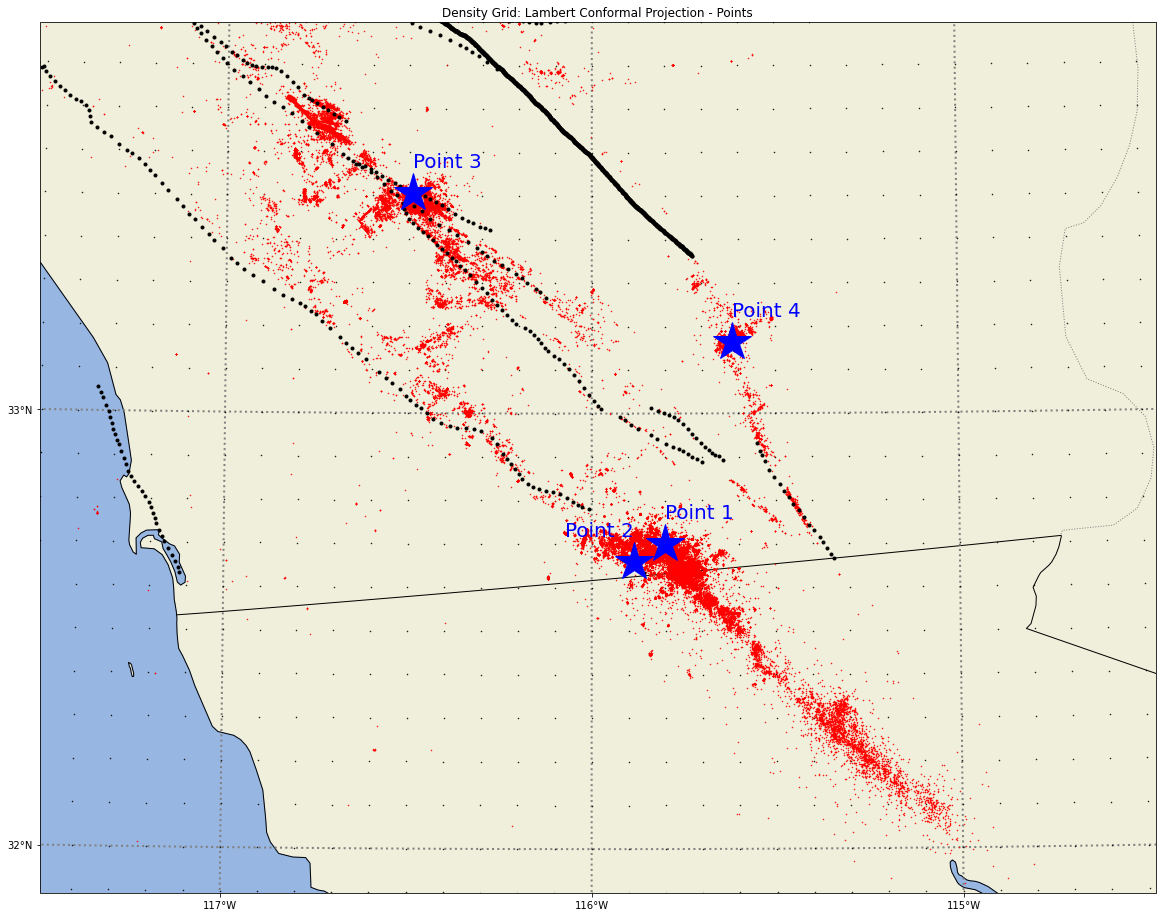

In [25]:
%%time
# Mapping: highlight four points 

proj = ccrs.LambertConformal(central_longitude = MeanLon, central_latitude = MeanLat)
fig = plt.figure(figsize = (20,20), frameon = True)
ax = plt.axes(projection = proj)
ax.set_extent([MeanLon - 1.5, MeanLon + 1.5, MeanLat - 1, MeanLat + 1], crs = ccrs.PlateCarree())
ax.add_feature(LAND);
ax.add_feature(OCEAN);
ax.coastlines(); # Put this line AFTER add_feature()s 
ax.add_feature(BORDERS,linestyle="-",linewidth=1); # Country border

states_provinces = cfeature.NaturalEarthFeature(category = "cultural", name = "admin_1_states_provinces_lines",
        scale = "50m", edgecolor = "grey", facecolor = "none", linestyle = "dotted")
ax.add_feature(states_provinces);

# ***GRIDLINES AND LABELS BLOCK***
gl=ax.gridlines(ylocs = np.arange(0, 90, 1), xlocs = np.arange(-180, 180, 1), 
                linewidth = 2, linestyle = "dotted", color = "grey")
# Added latitude, longitude grid lines
fig.canvas.draw()
xticks=list(range(-180, 180, 1))
yticks=list(range(0, 90, 1))
ax.xaxis.set_major_formatter(LONGITUDE_FORMATTER)
ax.yaxis.set_major_formatter(LATITUDE_FORMATTER)
lambert_xticks(ax, xticks)
lambert_yticks(ax, yticks)
# ***GRIDLINES AND LABELS BLOCK***

plt.title("Density Grid: Lambert Conformal Projection - Points")

# Plot density gridpoints
ax.plot(GridPoints["LONGITUDE"].values, GridPoints["LATITUDE"].values,
       transform = ccrs.Geodetic(), marker = ".", color = "black",
       markersize = 1, linestyle = "None");

# Plot EQ data
ax.plot(QTM_Range["LONGITUDE"].values, QTM_Range["LATITUDE"].values, 
        transform = ccrs.Geodetic(), marker = ".", color = "red", 
        markersize = 1, linestyle = "None");

# Plot fault traces
for i in range(len(FaultsIndices) - 1): # need -1 because reasons; stepping through indices of fault indices
    minimum = FaultsIndices[i] + 1 # minimum is row after first index; inclusive at beginning
    maximum = FaultsIndices[i+1] # maximum is row before last index; iloc is exclusive at end
    Temp = Faults.iloc[minimum:maximum].astype(float) # convert data from objects to floats
    ax.plot(Temp.LONGITUDE.values, Temp.LATITUDE.values, 
           transform = ccrs.Geodetic(), color = "black", 
            marker = ".", linestyle = "None");
    # plot each datapoint as a black dot
    
# Plot key points
ax.plot(Points.LONGITUDE.values, Points.LATITUDE.values, 
        transform = ccrs.Geodetic(), marker = "*", color = "blue", 
        markersize = 40, linestyle = "None");
ax.text(Point1.LONGITUDE, Point1.LATITUDE+0.05, "Point 1", transform = ccrs.Geodetic(),
       color = "blue", fontsize = 20, va = "bottom", ha = "left");
ax.text(Point2.LONGITUDE, Point2.LATITUDE+0.05, "Point 2", transform = ccrs.Geodetic(),
       color = "blue", fontsize = 20, va = "bottom", ha = "right");
ax.text(Point3.LONGITUDE, Point3.LATITUDE+0.05, "Point 3", transform = ccrs.Geodetic(),
       color = "blue", fontsize = 20, va = "bottom", ha = "left");
ax.text(Point4.LONGITUDE, Point4.LATITUDE+0.05, "Point 4", transform = ccrs.Geodetic(),
       color = "blue", fontsize = 20, va = "bottom", ha = "left");
    
plt.savefig("Maps/Density Grid/EQMap_Full_LambertConf_Density_Points.png", facecolor = "white");

## Combined Plots (2/26)
Redo all points: check within 0.1deg (instead of 11km)

In [26]:
# Redefine all points; distances counts: 0.1deg 
Point1 = pd.DataFrame({"LATITUDE" : [32.7], "LONGITUDE" : [-115.8]})
Point1Data["DEGDIST"] = Dists1_Deg
Point1Data_Deg = Point1Data.loc[Point1Data["DEGDIST"] <= 0.1]

Point2Data["DEGDIST"] = Dists2_Deg
Point2Data_Deg = Point2Data.loc[Point2Data["DEGDIST"] <= 0.1]

Point3Data["DEGDIST"] = Dists3_Deg
Point3Data_Deg = Point3Data.loc[Point3Data["DEGDIST"] <= 0.1]

Point4Data["DEGDIST"] = Dists4_Deg
Point4Data_Deg = Point4Data.loc[Point4Data["DEGDIST"] <= 0.1]

In [27]:
Point2Data_Deg.describe()

,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND,LATITUDE,LONGITUDE,DEPTH,MAGNITUDE,TIMESTAMP,VTIMESTAMP,RELATIVE DAY,RELATIVE HOUR,DISTANCE,DEGDIST
count,47217.0,47217.000000,47217.000000,47217.000000,47217.000000,47217.000000,47217.000000,47217.000000,47217.000000,47217.000000,4.721700e+04,4.721700e+04,47217.000000,47217.000000,47217.000000,47217.000000
mean,2010.0,4.061143,15.485164,11.227969,29.540272,29.903648,32.677003,-115.824243,6.781448,0.305158,1.271532e+09,1.271532e+09,12.862613,308.617426,7.712519,0.069360
std,0.0,0.256336,7.403802,6.677312,17.306135,17.322328,0.025984,0.046190,3.201142,0.756356,6.811520e+05,6.811520e+05,7.897478,189.208980,2.329971,0.020954
min,2010.0,3.000000,1.000000,0.000000,0.000000,0.003000,32.563610,-115.994970,-0.693000,-1.920000,1.267837e+09,1.267837e+09,-30.000000,-718.000000,0.445684,0.004008
25%,2010.0,4.000000,10.000000,6.000000,14.000000,14.790000,32.666520,-115.844030,4.940000,-0.230000,1.270951e+09,1.270951e+09,6.000000,147.000000,5.821871,0.052357
50%,2010.0,4.000000,15.000000,11.000000,30.000000,29.890000,32.675320,-115.811310,6.710000,0.220000,1.271450e+09,1.271450e+09,12.000000,286.000000,8.233996,0.074050
75%,2010.0,4.000000,22.000000,17.000000,45.000000,44.832000,32.691840,-115.787610,8.196000,0.740000,1.272051e+09,1.272051e+09,19.000000,453.000000,9.602543,0.086358
max,2010.0,5.000000,31.000000,23.000000,59.000000,59.998000,32.758000,-115.767540,28.090000,4.960000,1.273013e+09,1.273013e+09,30.000000,720.000000,11.119319,0.099998


Wall time: 1.4 s


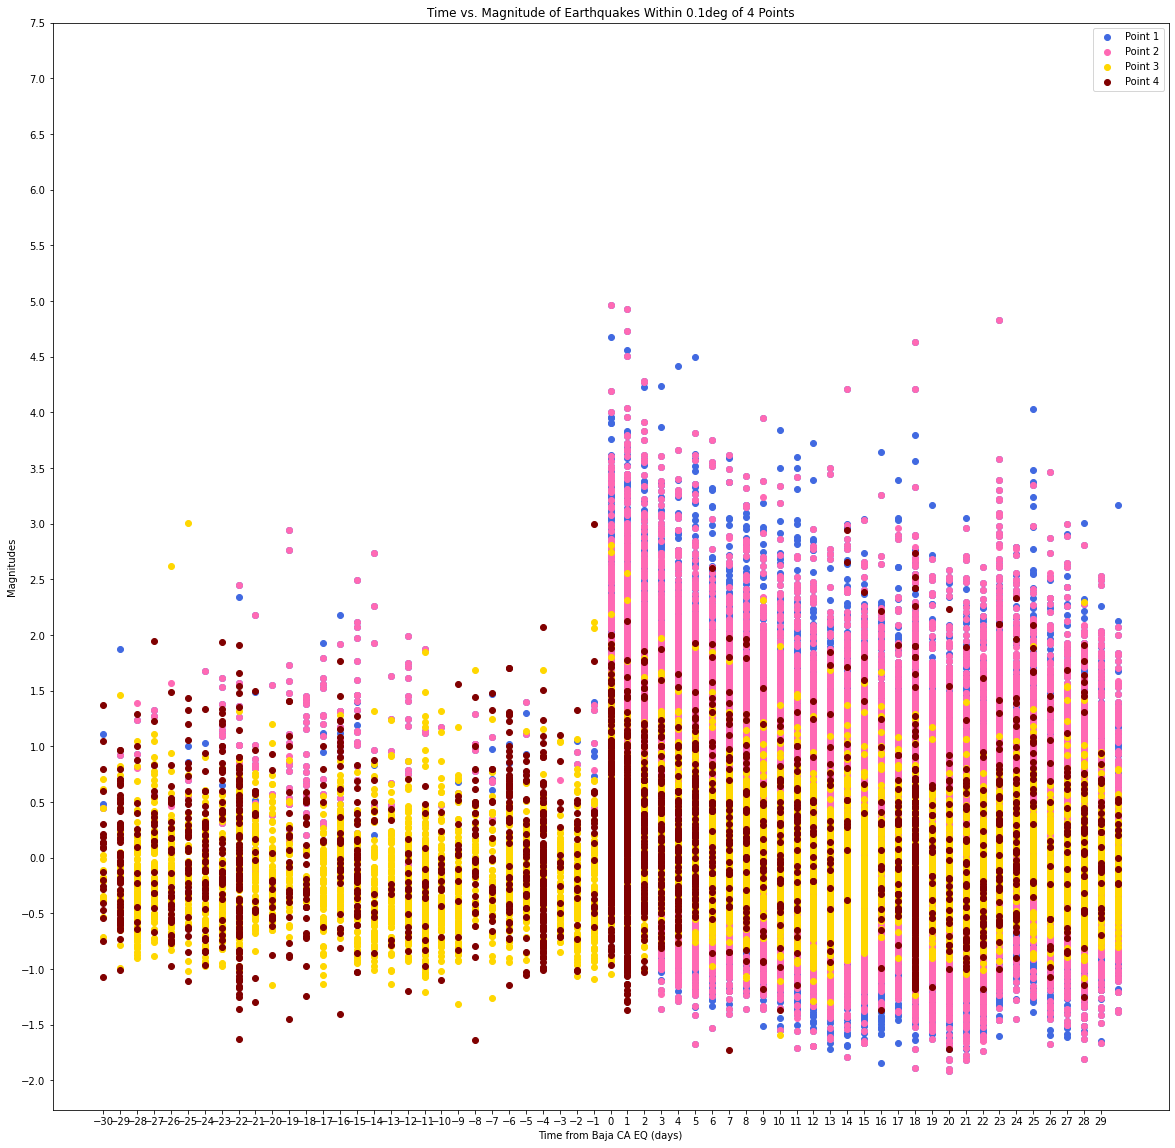

In [28]:
%%time
# Plot time vs. magnitude for all points: days

plt.figure(figsize=(20,20))

plt.scatter(Point1Data_Deg["RELATIVE DAY"], Point1Data_Deg["MAGNITUDE"], c = "royalblue");
plt.scatter(Point2Data_Deg["RELATIVE DAY"], Point2Data_Deg["MAGNITUDE"], c = "hotpink");
plt.scatter(Point3Data_Deg["RELATIVE DAY"], Point3Data_Deg["MAGNITUDE"], c = "gold");
plt.scatter(Point4Data_Deg["RELATIVE DAY"], Point4Data_Deg["MAGNITUDE"], c = "maroon");

plt.xlabel("Time from Baja CA EQ (days)");
plt.ylabel("Magnitudes");
plt.title("Time vs. Magnitude of Earthquakes Within 0.1deg of 4 Points");
plt.xticks(range(-30, 30));
plt.yticks(np.arange(-2,8,0.5));
plt.legend(["Point 1", "Point 2", "Point 3", "Point 4"]);

plt.savefig("Maps/Density Grid/ALLPoints_MagnitudeDays.png", facecolor = "white");

Wall time: 1.18 s


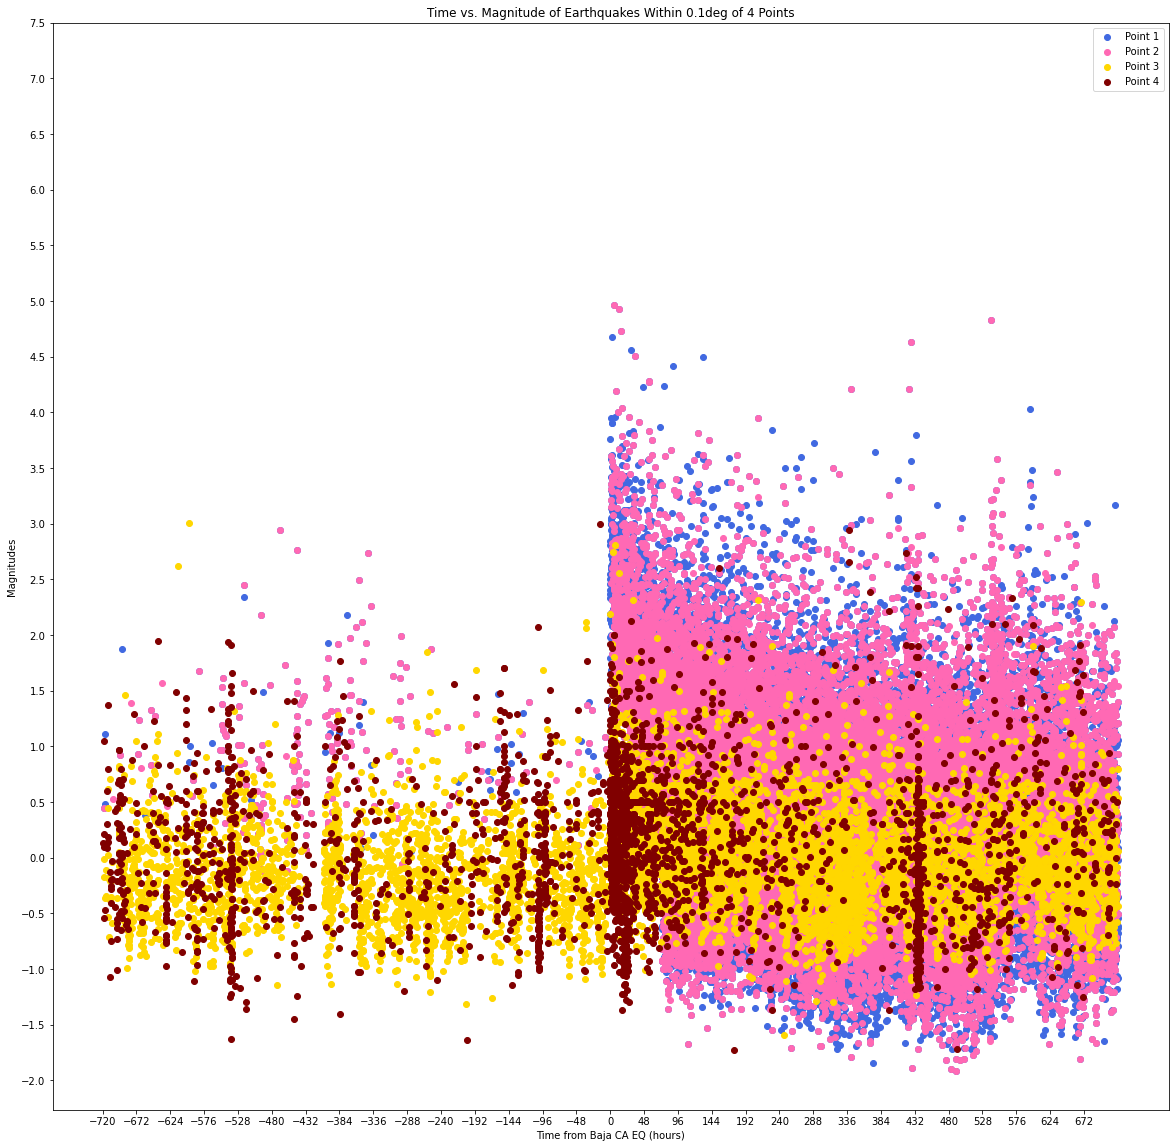

In [29]:
%%time
# Plot time vs. magnitude: hours

plt.figure(figsize=(20,20))

plt.scatter(Point1Data_Deg["RELATIVE HOUR"], Point1Data_Deg["MAGNITUDE"], c = "royalblue");
plt.scatter(Point2Data_Deg["RELATIVE HOUR"], Point2Data_Deg["MAGNITUDE"], c = "hotpink");
plt.scatter(Point3Data_Deg["RELATIVE HOUR"], Point3Data_Deg["MAGNITUDE"], c = "gold");
plt.scatter(Point4Data_Deg["RELATIVE HOUR"], Point4Data_Deg["MAGNITUDE"], c = "maroon");

plt.xlabel("Time from Baja CA EQ (hours)");
plt.ylabel("Magnitudes");
plt.title("Time vs. Magnitude of Earthquakes Within 0.1deg of 4 Points");
plt.xticks(range(-720,720, 48));
plt.yticks(np.arange(-2,8,0.5));
plt.legend(["Point 1", "Point 2", "Point 3", "Point 4"]);

plt.savefig("Maps/Density Grid/ALLPoints_MagnitudeHours.png", facecolor = "white");

In [30]:
Point1Data_Deg["RELATIVE DAY"].count()
Point2Data_Deg["RELATIVE DAY"].count()

47217

Wall time: 773 ms


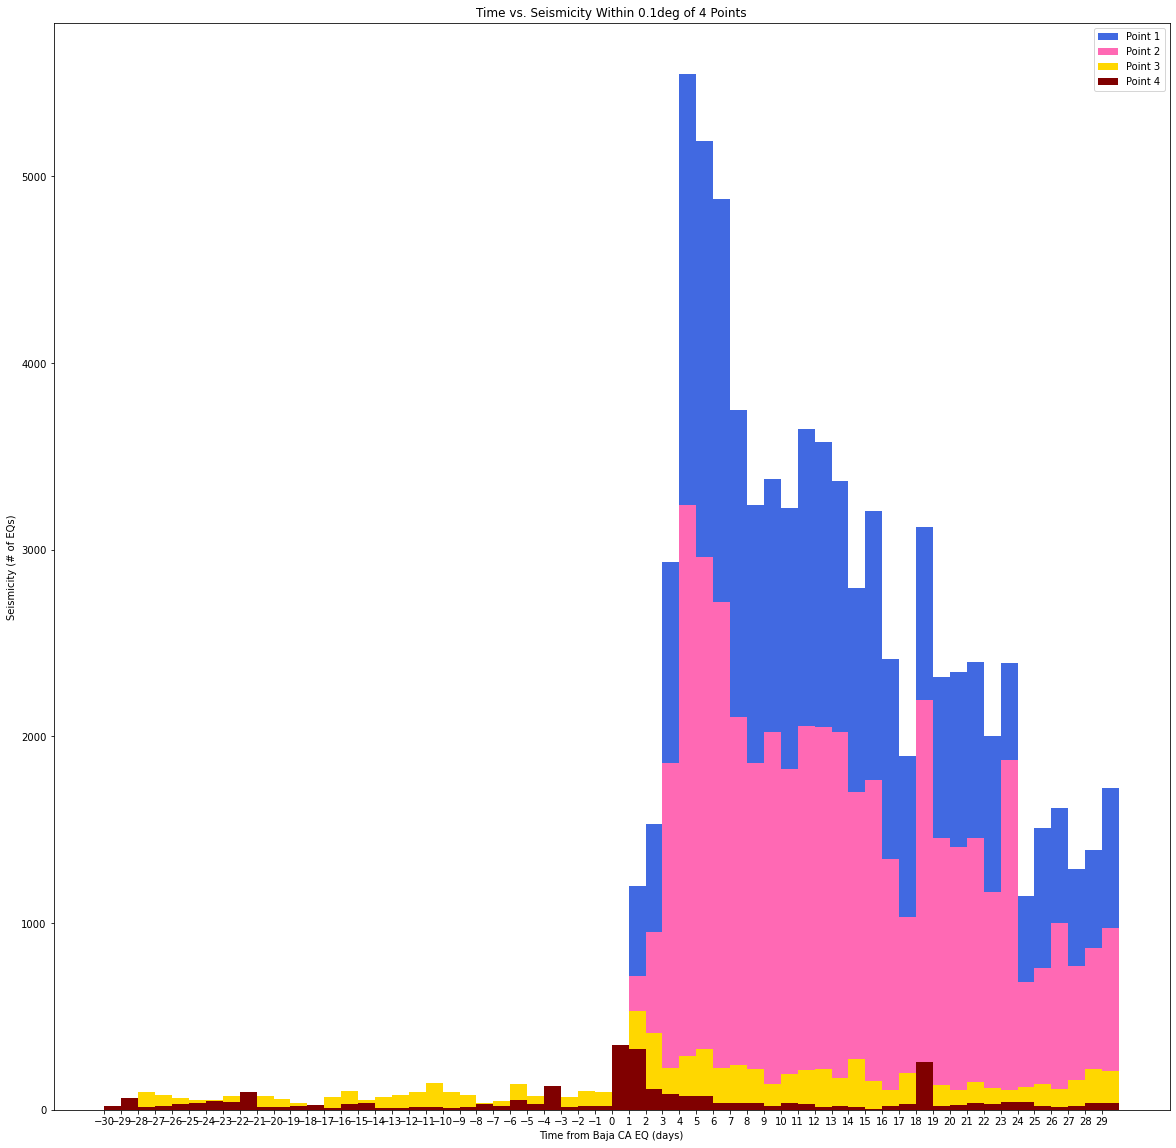

In [31]:
%%time
# Plot time vs. number of events: days

plt.figure(figsize=(20,20))

plt.hist(Point1Data_Deg["RELATIVE DAY"], bins = 60, color = "royalblue");
#plt.scatter(Point1Data_Deg["RELATIVE DAY"], Point1)
plt.hist(Point2Data_Deg["RELATIVE DAY"], bins = 60, color = "hotpink");
plt.hist(Point3Data_Deg["RELATIVE DAY"], bins = 60, color = "gold");
plt.hist(Point4Data_Deg["RELATIVE DAY"], bins = 60, color = "maroon");

plt.xlabel("Time from Baja CA EQ (days)");
plt.ylabel("Seismicity (# of EQs)");
plt.title("Time vs. Seismicity Within 0.1deg of 4 Points");
plt.xticks(range(-30,30));
plt.legend(["Point 1", "Point 2", "Point 3", "Point 4"]);

plt.savefig("Maps/Density Grid/ALLPoints_SeismicityDays.png", facecolor = "white")

Wall time: 8.59 s


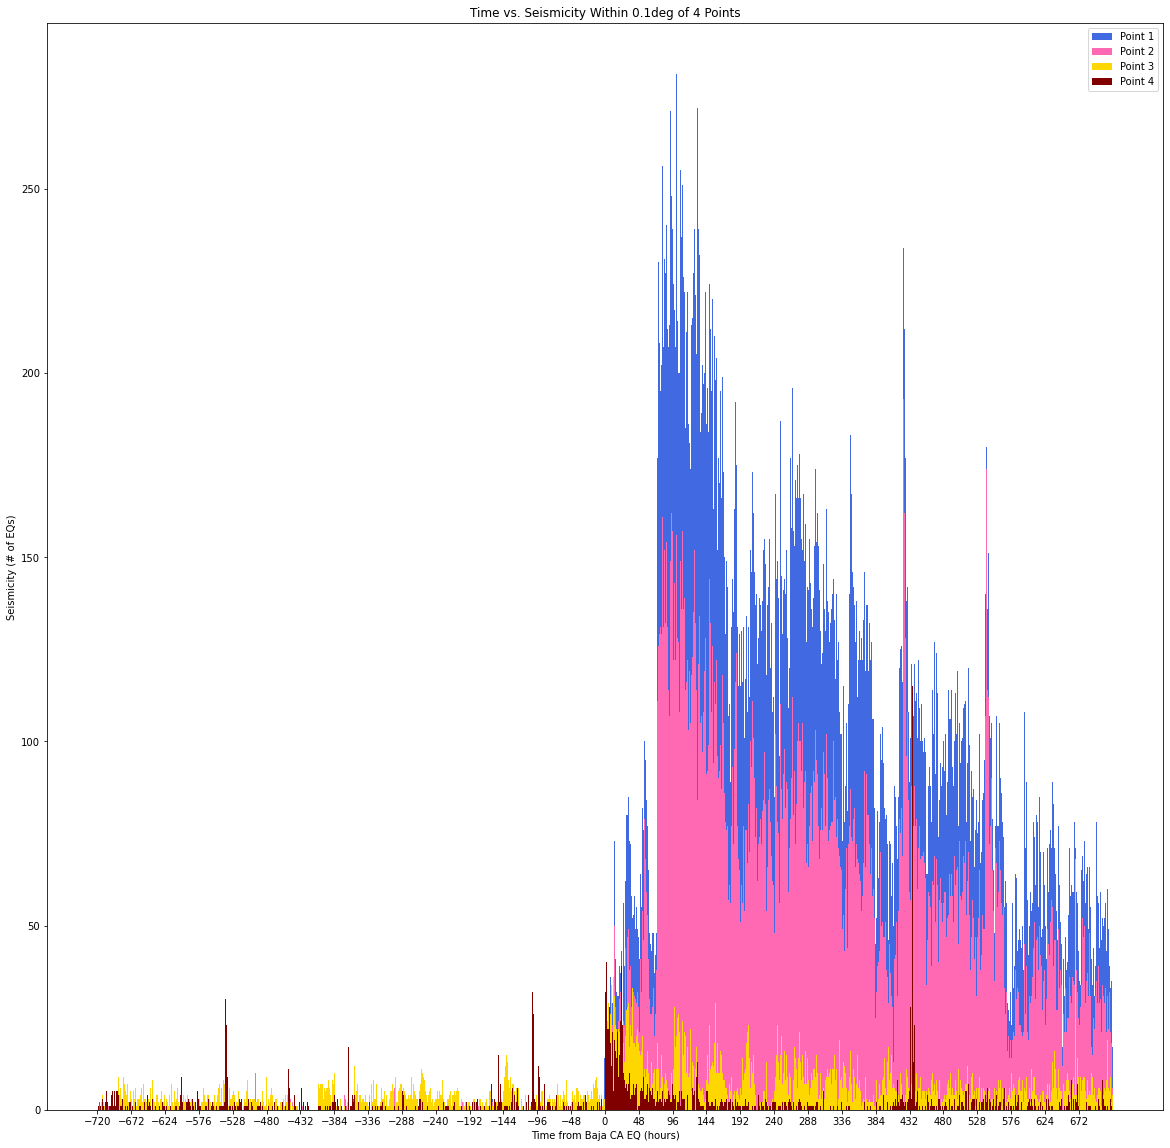

In [32]:
%%time
# Plot time vs. number of events: hours

plt.figure(figsize=(20,20))

plt.hist(Point1Data_Deg["RELATIVE HOUR"], bins = 60*24, color = "royalblue");
plt.hist(Point2Data_Deg["RELATIVE HOUR"], bins = 60*24, color = "hotpink");
plt.hist(Point3Data_Deg["RELATIVE HOUR"], bins = 60*24, color = "gold");
plt.hist(Point4Data_Deg["RELATIVE HOUR"], bins = 60*24, color = "maroon");

plt.xlabel("Time from Baja CA EQ (hours)");
plt.ylabel("Seismicity (# of EQs)");
plt.title("Time vs. Seismicity Within 0.1deg of 4 Points");
plt.xticks(np.arange(-720, 720, 48));
plt.legend(["Point 1", "Point 2", "Point 3", "Point 4"]);

plt.savefig("Maps/Density Grid/ALLPoints_SeismicityHours.png", facecolor = "white")

Wall time: 336 ms


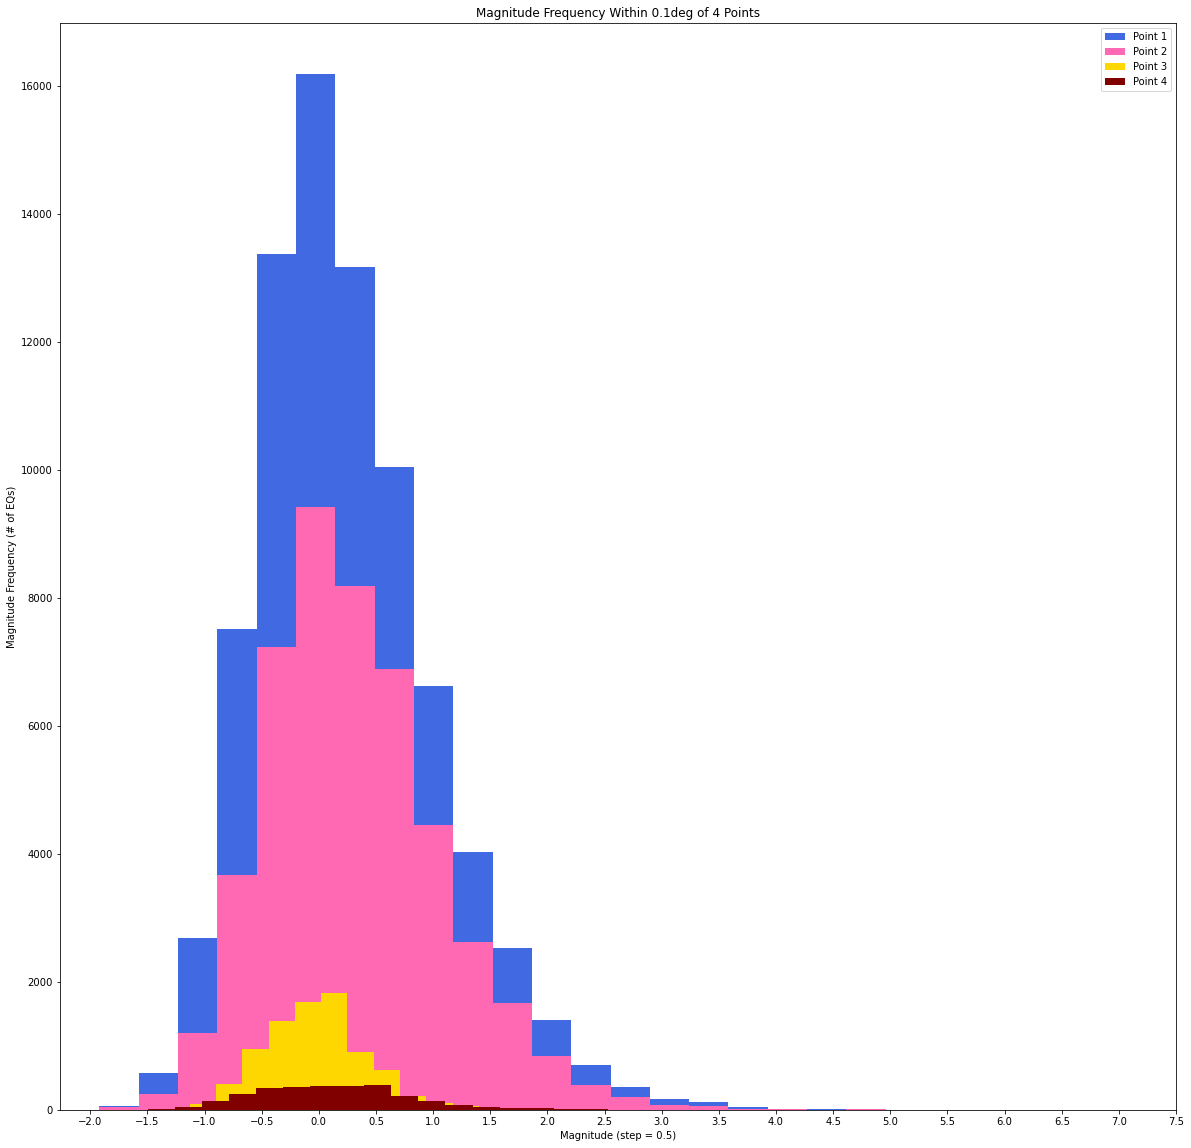

In [33]:
%%time
# Plot magnitude vs. event count (frequency)

plt.figure(figsize=(20,20))

plt.hist(Point1Data_Deg["MAGNITUDE"], bins = 20, color = "royalblue");
plt.hist(Point2Data_Deg["MAGNITUDE"], bins = 20, color = "hotpink");
plt.hist(Point3Data_Deg["MAGNITUDE"], bins = 20, color = "gold");
plt.hist(Point4Data_Deg["MAGNITUDE"], bins = 20, color = "maroon");

plt.xlabel("Magnitude (step = 0.5)");
plt.ylabel("Magnitude Frequency (# of EQs)");
plt.title("Magnitude Frequency Within 0.1deg of 4 Points");
plt.xticks(np.arange(-2, 8, step = 0.5));
plt.legend(["Point 1", "Point 2", "Point 3", "Point 4"]);

plt.savefig("Maps/Density Grid/AllPoints_MagDist.png", facecolor = "white")

In [34]:
# 3/4
# Make magnitude frequency distributions of four points
MagList = np.arange(-2.0, 8.0, 0.1)
MFDList1, MFDList2, MFDList3, MFDList4 = [], [], [], []
for i in MagList:
    MFDList1.append(len(Point1Data_Deg.loc[Point1Data_Deg["MAGNITUDE"] >= i]))
    MFDList2.append(len(Point2Data_Deg.loc[Point2Data_Deg["MAGNITUDE"] >= i]))
    MFDList3.append(len(Point3Data_Deg.loc[Point3Data_Deg["MAGNITUDE"] >= i]))
    MFDList4.append(len(Point4Data_Deg.loc[Point4Data_Deg["MAGNITUDE"] >= i]))

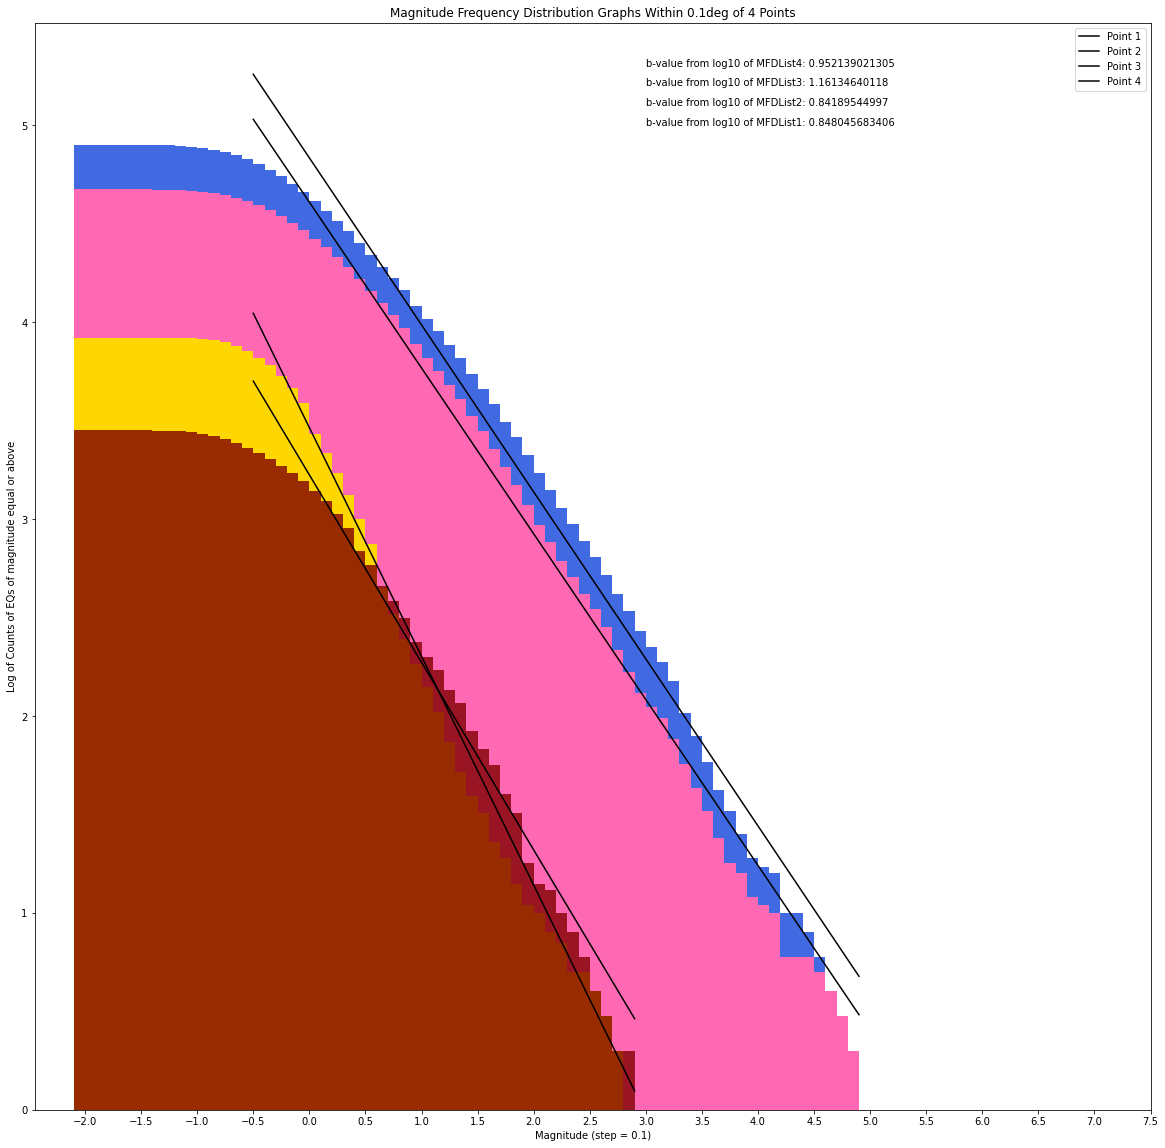

In [35]:
# Plot four points' magnitude frequency distributions on log base 10 scale
plt.figure(figsize = (20,20));
plt.bar(x = MagList, height = np.log10(MFDList1), align = "edge", width = -0.1, color = "royalblue",
        zorder = 1);
plt.bar(x = MagList, height = np.log10(MFDList2), align = "edge", width = -0.1, color = "hotpink",
       alpha = 1);
plt.bar(x = MagList, height = np.log10(MFDList3), align = "edge", width = -0.1, color = "gold");
plt.bar(x = MagList, height = np.log10(MFDList4), align = "edge", width = -0.1, color = "maroon", 
        alpha = 0.8);


M_B_1 = np.polyfit(MagList[15:-30], np.log10(MFDList1[15:-30]), 1)
Model1 = np.polyval(M_B_1, MagList[15:-30])
plt.plot(MagList[15:-30], Model1, "k-");
plt.text(3,5, "b-value from log10 of MFDList1: " + str(-M_B_1[0]))

M_B_2 = np.polyfit(MagList[15:-30], np.log10(MFDList2[15:-30]), 1)
Model2 = np.polyval(M_B_2, MagList[15:-30])
plt.plot(MagList[15:-30], Model2, "k-");
plt.text(3,5+0.1, "b-value from log10 of MFDList2: " + str(-M_B_2[0]))

M_B_3 = np.polyfit(MagList[15:-50], np.log10(MFDList3[15:-50]), 1)
Model3 = np.polyval(M_B_3, MagList[15:-50])
plt.plot(MagList[15:-50], Model3, "k-");
plt.text(3,5+0.2, "b-value from log10 of MFDList3: " + str(-M_B_3[0]))

M_B_4 = np.polyfit(MagList[15:-50], np.log10(MFDList4[15:-50]), 1)
Model4 = np.polyval(M_B_4, MagList[15:-50])
plt.plot(MagList[15:-50], Model4, "k-");
plt.text(3,5+0.3, "b-value from log10 of MFDList4: " + str(-M_B_4[0]))

plt.xlabel("Magnitude (step = 0.1)");
plt.ylabel("Log of Counts of EQs of magnitude equal or above");
plt.title("Magnitude Frequency Distribution Graphs Within 0.1deg of 4 Points");
plt.xticks(np.arange(-2, 8, step = 0.5));
plt.legend(["Point 1", "Point 2", "Point 3", "Point 4"]);

plt.savefig("Maps/Density Grid/AllPoints_MagFreqDist.png", facecolor = "white")